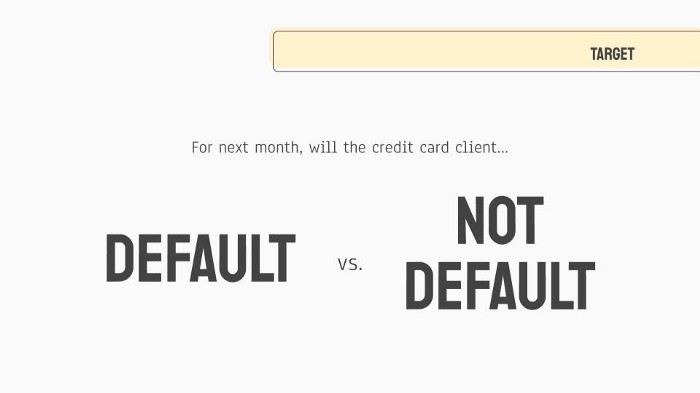

# Business Problem
Our client is a credit card company. They have brought us a dataset that includes some demographics and recent financial data (the past six months) for a sample of 30,000 of their account holders. This data is at the credit account level; in other words, there is one row for each account (you should always clarify what the definition of a row is, in a dataset). Rows are labeled by whether in the next month after the six month historical data period, an account owner has defaulted, or in other words, failed to make the minimum payment.

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

In [36]:
#data = pd.read_csv("default_of_credit_card_clients.csv")
data = pd.read_excel("default_of_credit_card_clients.xls")

In [37]:
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [38]:
data.shape

(30000, 25)

In [39]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [41]:
data.dtypes

ID                            object
LIMIT_BAL                      int64
SEX                            int64
EDUCATION                      int64
MARRIAGE                       int64
AGE                            int64
PAY_1                         object
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month     int64
dtype: object

In [42]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,165760.989333,1.586500,1.833333,1.535900,35.108800,-0.132867,-0.164333,-0.219300,-0.263900,-0.288033,...,42791.362167,39884.398167,38480.350933,5613.321500,5.855410e+03,5174.387967,4776.089733,4754.749200,5164.223267,0.218733
std,130158.590432,0.513348,0.807699,0.542698,9.851592,1.191215,1.191096,1.162348,1.127519,1.144981,...,64090.316188,60606.644833,59406.836932,16539.094312,2.299256e+04,17565.538305,15532.893047,15239.070708,17712.664703,0.413394
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2034.000000,1534.000000,1080.000000,836.000000,7.217500e+02,371.000000,223.000000,170.750000,9.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18759.500000,17835.500000,16643.000000,2084.500000,2.000000e+03,1776.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53572.250000,49804.000000,48863.500000,5000.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


# 1. Verification of Data Integrity

In [105]:
#df = data.copy(deep=True)

In [106]:
#categorical_df = df.select_dtypes(include=['object'])
#numerical_df = df.select_dtypes(exclude=['object'])
#print
#print("categorical columns are: ",categorical_df.columns)
#print("\n")
#print("numerical_columns are: ",numerical_df.columns)

###### Let's quickly review the dataset info that was given to us by the client:

-  <b>LIMIT_BAL:</b> Amount of the credit provided (in New Taiwanese (NT) dollar) including individual consumer credit and the family (supplementary) credit
-  <b>SEX:</b> Gender (1 = male; 2 = female). <b>I will not be using the gender data to decide credit-worthiness owing to ethical considerations.</b>
-  <b>EDUCATION:</b> Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
-  <b>MARRIAGE:</b> Marital status (1 = married; 2 = single; 3 = others).
-  <b>AGE:</b> Age (year).
-  <b>PAY_1–Pay_6:</b> A record of past payments. Past monthly payments, recorded from April to September, are stored in these columns.
-  PAY_1 represents the repayment status in September; PAY_2 = repayment status in August; and so on up to PAY_6, which represents the repayment status in April.
-  The measurement scale for the repayment status is as follows: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; and so on up to 8 = payment delay for eight months; 9 = payment delay for nine months and above.
-  <b>BILL_AMT1–BILL_AMT6:</b> Bill statement amount (in NT dollar).
-  <b>BILL_AMT1</b> represents the bill statement amount in September; BILL_AMT2 represents the bill statement amount in August; and so on up to BILL_AMT7, which represents the bill statement amount in April.
-  <b>PAY_AMT1–PAY_AMT6:</b> Amount of previous payment (NT dollar). PAY_AMT1 represents the amount paid in September; PAY_AMT2 represents the amount paid in August; and so on up to PAY_AMT6, which represents the amount paid in April. 

In [43]:
print("The total number of rows :",data['ID'].shape,"Out of which number of unique values:",data['ID'].nunique())

The total number of rows : (30000,) Out of which number of unique values: 29687


We see here that the number of unique IDs is less than the number of rows. This implies that the ID is not a unique identifier for the rows of the data, as we thought. So we know that there is some duplication of IDs. But how much? Is one ID duplicated many times? How many IDs are duplicated? 

In [44]:
id_counts = data['ID'].value_counts()
id_counts.head()

f86688f1-8742    2
69566a6b-6156    2
feac3745-a2be    2
f5e3478e-cf68    2
9878723a-0b58    2
Name: ID, dtype: int64

In [45]:
#Lets Display the number of grouped duplicated entries by running another value count:
id_counts.value_counts()
#we can see that most IDs occur exactly once, as expected. However, 313 IDs occur twice. So, no ID occurs more than twice.

1    29374
2      313
Name: ID, dtype: int64

In [46]:
dupe_mask = id_counts == 2
dupe_mask[0:5]

f86688f1-8742    True
69566a6b-6156    True
feac3745-a2be    True
f5e3478e-cf68    True
9878723a-0b58    True
Name: ID, dtype: bool

In [47]:
id_counts.index[0:5]

Index(['f86688f1-8742', '69566a6b-6156', 'feac3745-a2be', 'f5e3478e-cf68',
       '9878723a-0b58'],
      dtype='object')

In [48]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids

Index(['f86688f1-8742', '69566a6b-6156', 'feac3745-a2be', 'f5e3478e-cf68',
       '9878723a-0b58', 'b74033dc-6e45', 'd9dafe9c-b497', '3cd5c728-df14',
       '33b2b726-61a8', '15edb406-305b',
       ...
       'c9826d63-f7d3', '555a25cd-2d05', 'cb18af1f-3b53', '062f1fe4-9a66',
       '4cf8397f-6359', 'a51dbaae-d88b', '59387843-6db1', 'cd944abe-cef9',
       'c89b26ff-ec7f', '3327c2a8-3402'],
      dtype='object', length=313)

In [49]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [50]:
dupe_ids[0:5]

['f86688f1-8742',
 '69566a6b-6156',
 'feac3745-a2be',
 'f5e3478e-cf68',
 '9878723a-0b58']

In [51]:
data.loc[data['ID'].isin(dupe_ids[0:3]),:].head(10) 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
7293,f86688f1-8742,100000,2,2,1,27,-2,-2,-2,-2,...,0,0,0,4780,0,0,0,0,0,0
7393,f86688f1-8742,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12424,feac3745-a2be,220000,1,3,2,30,0,0,-1,-1,...,5036,8269,3681,1066,4723,5051,8293,3692,3087,0
12524,feac3745-a2be,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12826,69566a6b-6156,50000,2,3,1,59,Not available,2,0,0,...,45736,46748,47816,0,2045,1785,1900,2000,2210,0
12926,69566a6b-6156,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
data_zero_mask = data == 0
data_zero_mask

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [53]:
feature_zero_mask = data_zero_mask.iloc[:,1:].all(axis=1)
feature_zero_mask

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [54]:
sum(feature_zero_mask)

315

In [55]:
df_clean_1 = data.loc[~feature_zero_mask,:].copy()

In [56]:
df_clean_1.shape

(29685, 25)

In [57]:
df_clean_1['ID'].nunique()

29685

# 1.2. Exploring and Cleaning the Data

In [58]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [60]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [61]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [68]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [69]:
sum(valid_pay_1_mask) #29,685 – 3,021 = 26,664

26664

In [70]:
#REMOVING MISSING VALUES FOR NOW
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [71]:
df_clean_2.shape

(26664, 25)

In [72]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [73]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


<blockquote>get back in touch with our business partner and learned the following information:
-2 means the account started that month with a zero balance, and never used any credit
-1 means the account had a balance that was paid in full
0 means that at least the minimum payment was made, but the entire balance wasn't paid (that is, a positive balance was carried to the next month)</blockquote>

# 1.3. Data Quality Assurance and Exploration

<blockquote>Our business partner has reached out to us, to let us know that gender should not be used to predict credit-worthiness, as this is unethical by their standards. So we keep this in mind for future reference. Now we explore the rest of these columns, making any corrections that are necessary.</blockquote>

# 1.4. Exploring the Credit Limit and Demographic Features

In [90]:
mpl.rcParams['figure.dpi'] = 120 #high resolution figures #(dpi = dots per inch)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000272396ABF48>,
      dtype=object)

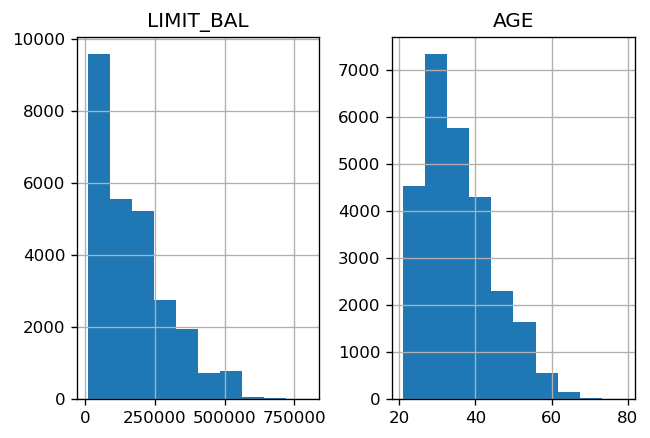

In [91]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [92]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


LIMIT_BAL, the credit limit, seems to make sense. The credit limits have a minimum of 10,000. This dataset is from Taiwan; the exact unit of currency (NT dollar) may not be familiar, but intuitively, a credit limit should be above zero. You are encouraged to look up the conversion to your local currency and consider these credit limits. For example, 1 US dollar is about 30 NT dollars.

The AGE feature also looks reasonably distributed, with no one under the age of 21 having a credit account.

In [93]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

<blockquote>Here, I see undocumented education levels 0, 5, and 6, as the data dictionary describes only 
"Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)". Our business partner tells us they don't know about the others. Since they are not very prevalent, I will lump them in with the "others" category, which seems appropriate, with our client's blessing, of course.</blockquote>

In [94]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [95]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

<blockquote>The issue here is similar to that encountered for the EDUCATION feature; there is a value, 0, which is not documented in the data dictionary: "1 = married; 2 = single; 3 = others". So we'll lump it in with "others".</blockquote>

In [96]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

# 1.5. Deep Dive: Categorical Features

Text(0.5, 0, 'Education level: ordinal encoding')

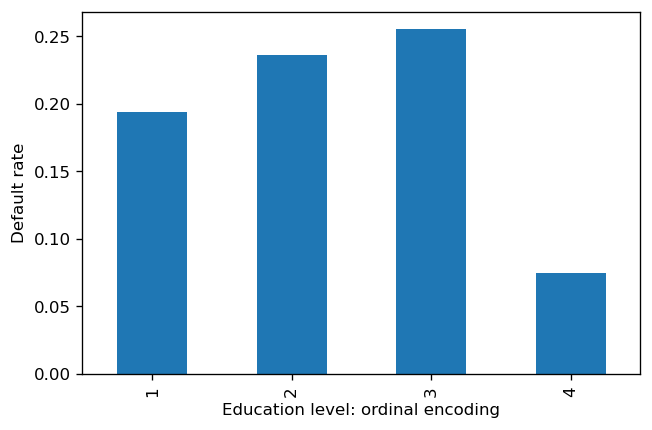

In [97]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

<blockquote>It looks like a straight-line fit would probably not be the best description of the data here. In case a feature has a non-linear effect like this, it may be better to use a more complex algorithm such as a decision tree or random forest. Or, if a simpler and more interpretable linear model such as logistic regression is desired, i will avoid an ordinal encoding and use a different way of encoding categorical variables. A popular way of doing this is called one-hot encoding (OHE).</blockquote>

# 1.6. Implementing OHE for a Categorical Feature

In [98]:
#create empty column
df_clean_2['EDUCATION_CAT'] = 'none'

In [99]:
# I have to populate the columns EDUCATION_CAT later
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [100]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [101]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [102]:
#Lets create dummies
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [103]:
#To cross varify 
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [104]:
# write back to the local machine
df_with_ohe.to_csv('cleaned_data.csv', index=False)

# 2. Exploring the Financial History Features in the Dataset

In [140]:
df = pd.read_csv('cleaned_data.csv')

In [107]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [108]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [122]:
df[pay_feats]

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
...,...,...,...,...,...,...
26659,0,0,0,0,0,0
26660,-1,-1,-1,-1,0,0
26661,4,3,2,-1,0,0
26662,1,-1,0,0,0,-1


In [110]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [111]:
df[pay_feats[0]].value_counts().sort_index() 

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

<blockquote>Compared to the positive integer values, most of the values are either -2, -1, or 0, which correspond to an account that was in good standing last month: not used, paid in full, or made at least the minimum payment.</blockquote>

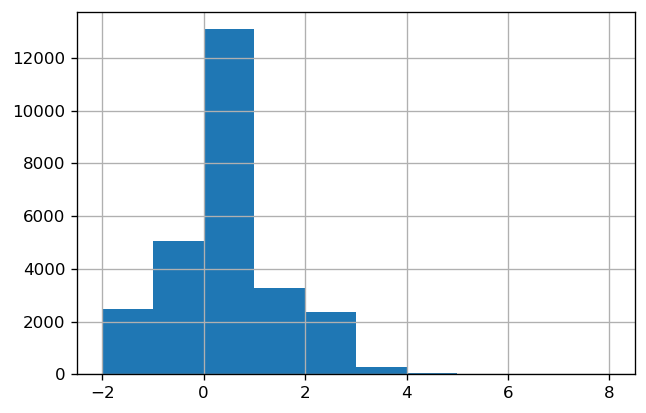

In [113]:
df[pay_feats[0]].hist()

In [119]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

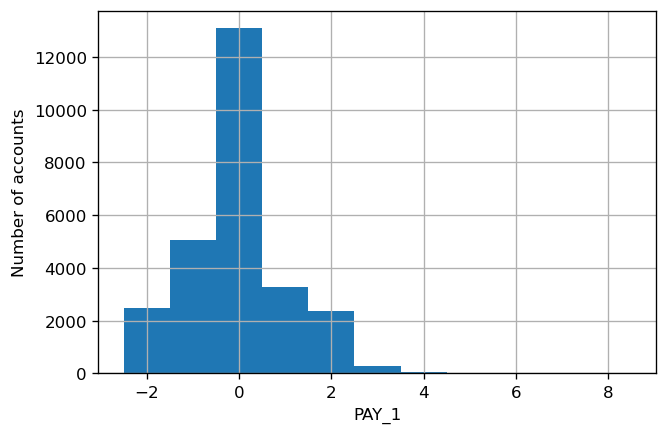

In [120]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

<blackquote>it's more common for the "months late" to be a smaller number. This makes sense; likely, most people are paying off their balances before too long. Otherwise, their account may be closed or sold to a collection agency. Examining the distribution of features and making sure it seems reasonable is a good thing to confirm with client, as the quality of these data underlie the predictive modeling you seek to do.</blackquote>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027247773748>,
      dtype=object)

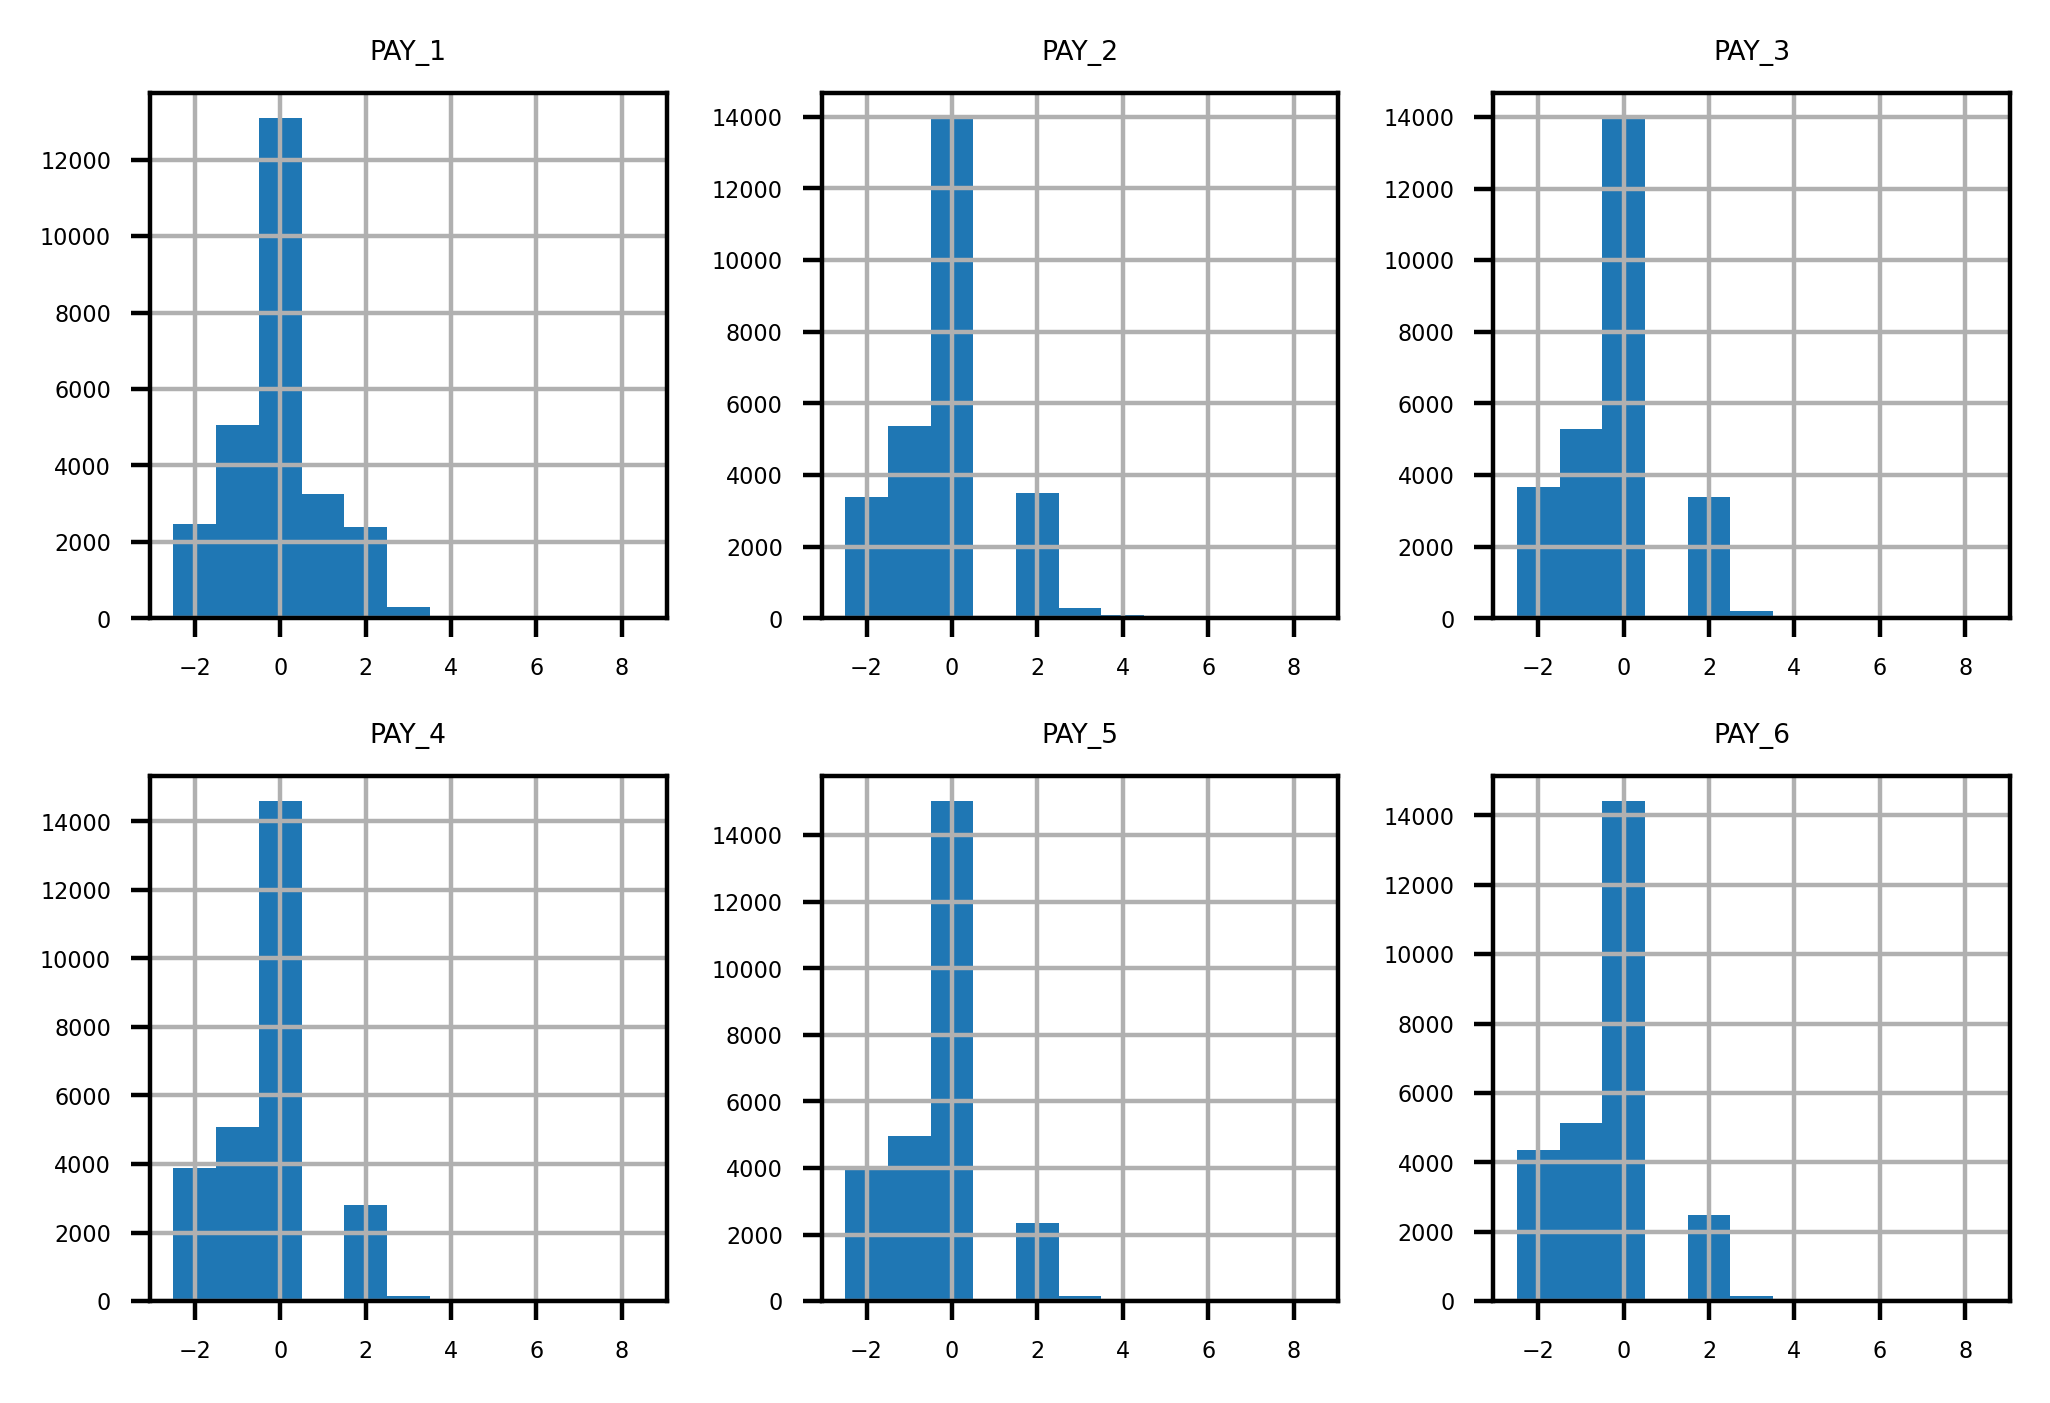

In [178]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

- Consider the values between July (PAY_3) and August (PAY_2). In July, there are very few accounts that had a 1-month payment delay; this bar is not really visible in the histogram.
- However, in August, there are suddenly thousands of accounts with a 2-month payment delay. 
- This does not make sense: the number of accounts with a 2-month delay in a given month should be less than or equal to the number of accounts with a 1-month delay in the previous month

In [124]:
#Lets tackle that issue
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


- It's clear that accounts with a 2-month delay in August have nonsensical values for the July payment status.
- The client lets us know that they had been having problems with pulling the most recent month of data, leading to faulty reporting for accounts that had a 1-month delay in payment.

This is a key point: a predictive model relies on getting the same kind of data to make predictions that it was trained on. This means we can use PAY_1 as a feature in our model, but not PAY_2 or the other payment status features from previous months.

In [ ]:
#Lets explore the remaining columns

In [125]:
%autosave 10

Autosaving every 10 seconds


In [130]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [150]:
pay_amt_feats = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [143]:
df[bill_feats]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
...,...,...,...,...,...,...
26659,188948,192815,208365,88004,31237,15980
26660,1683,1828,3502,8979,5190,0
26661,3565,3356,2758,20878,20582,19357
26662,-1645,78379,76304,52774,11855,48944


In [132]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000272459F7EC8>,
      dtype=object)

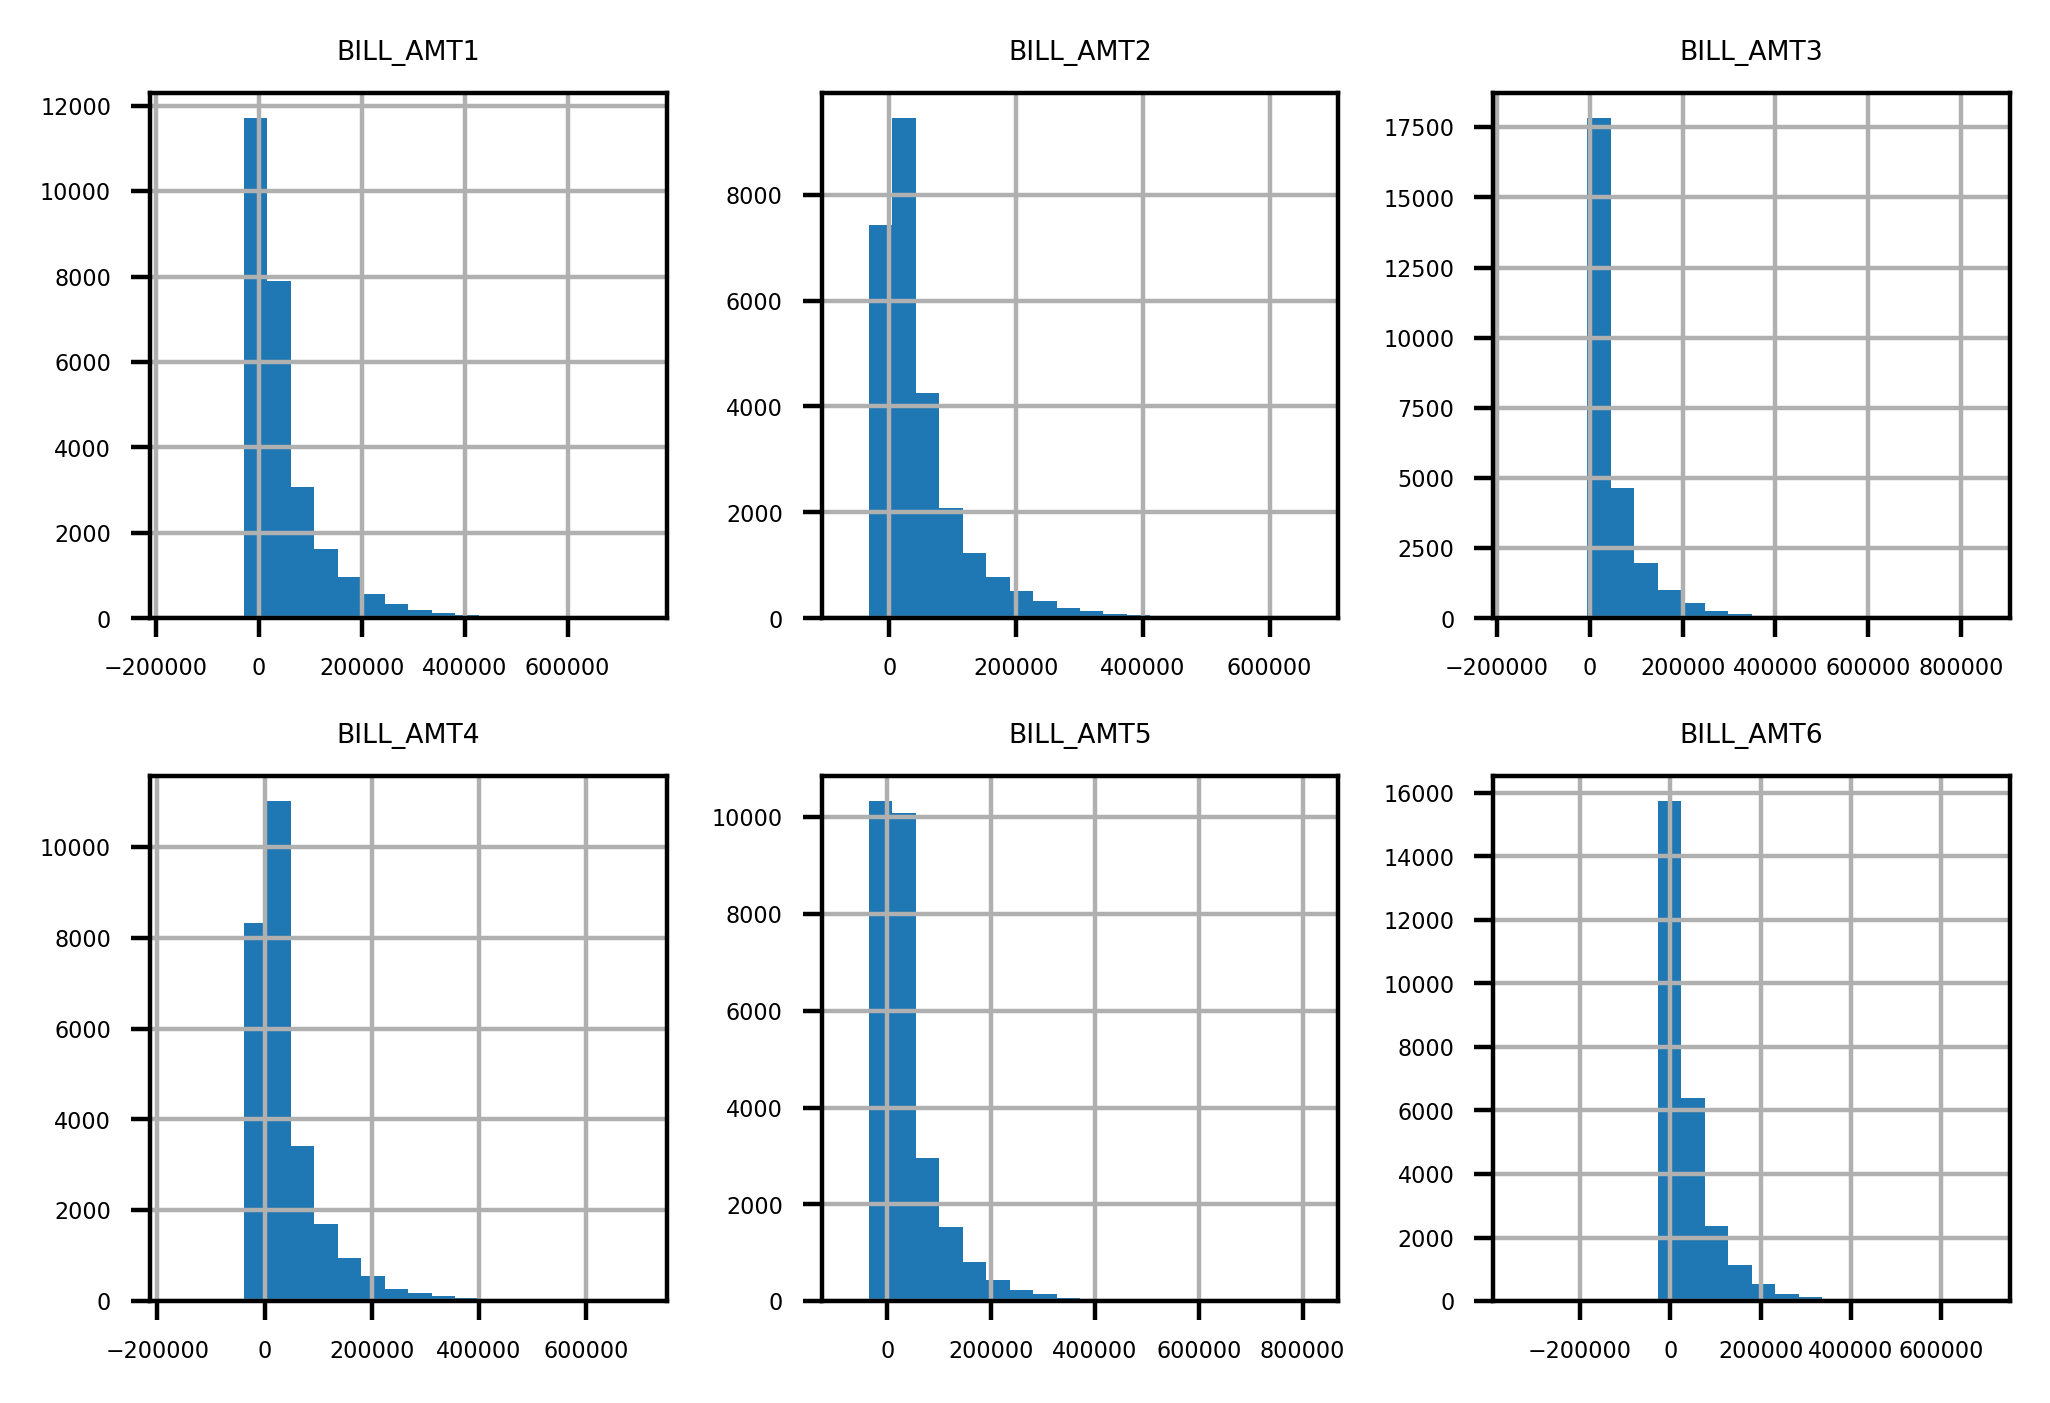

In [175]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 4
df[bill_feats].hist(bins=20, layout=(2,3))

In [151]:
df[pay_amt_feats]

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...
26659,8500,20000,5003,3047,5000,1000
26660,1837,3526,8998,129,0,0
26661,0,0,22000,4200,2000,3100
26662,85900,3409,1178,1926,52964,1804


In [152]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027245AFFE88>,
      dtype=object)

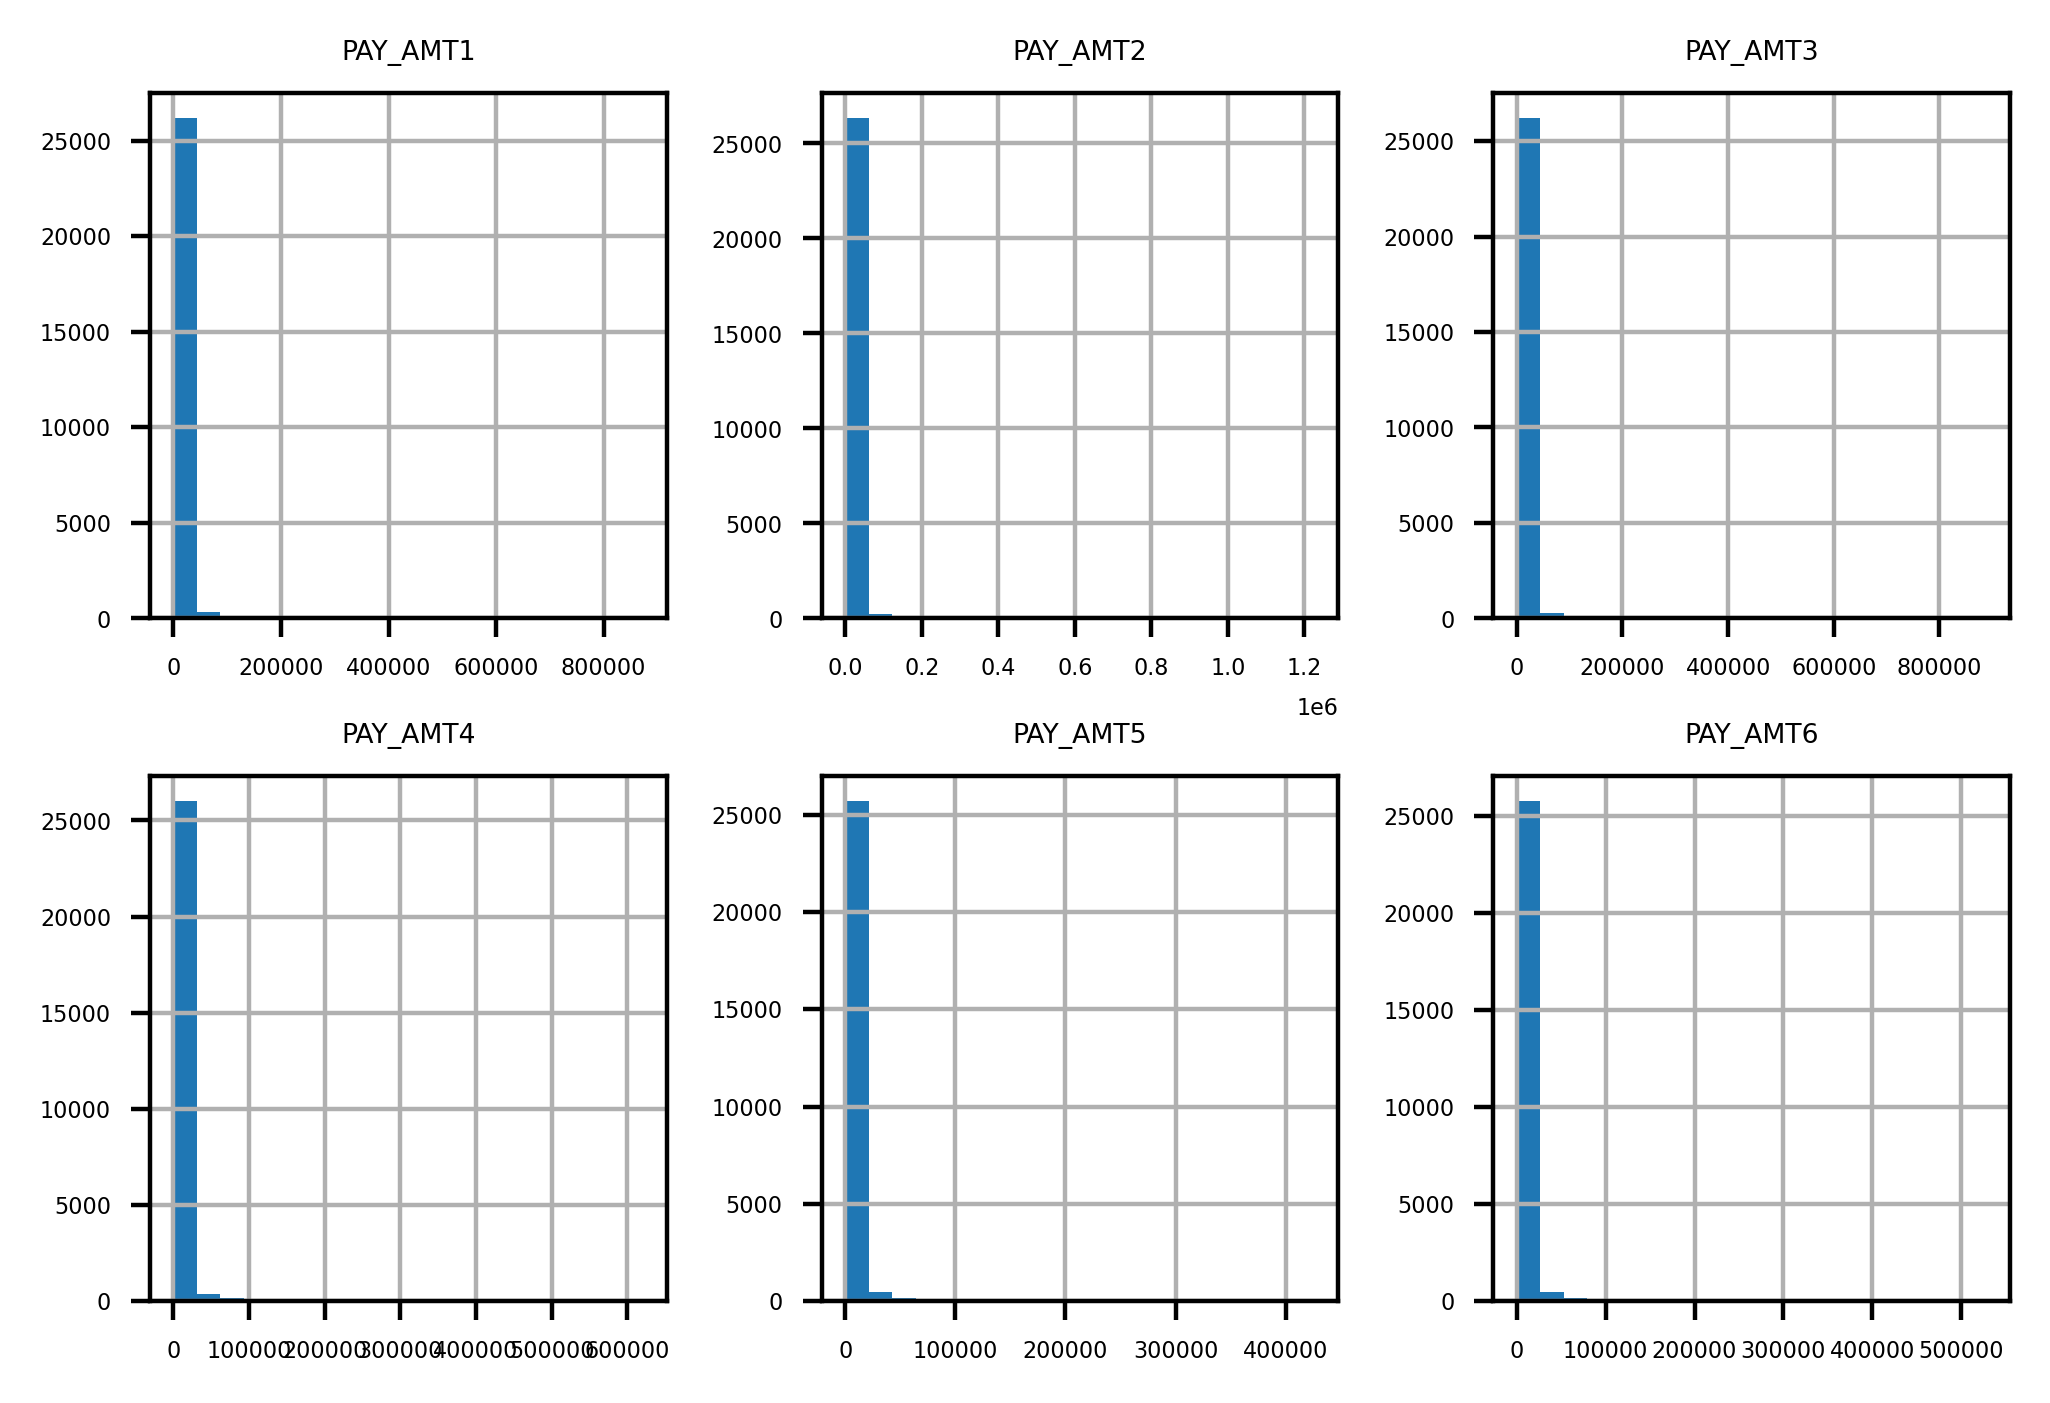

In [176]:
#mpl.rcParams['figure.dpi'] = 400
#mpl.rcParams['font.size'] = 4
df[pay_amt_feats].hist(bins=20, layout=(2,3))

- as we see in the above graph the most of the values are around 0

In [164]:
#Lets count the number of Zeros
payment_zero_mask = df[pay_amt_feats] == 0

In [166]:
payment_zero_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [165]:
payment_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

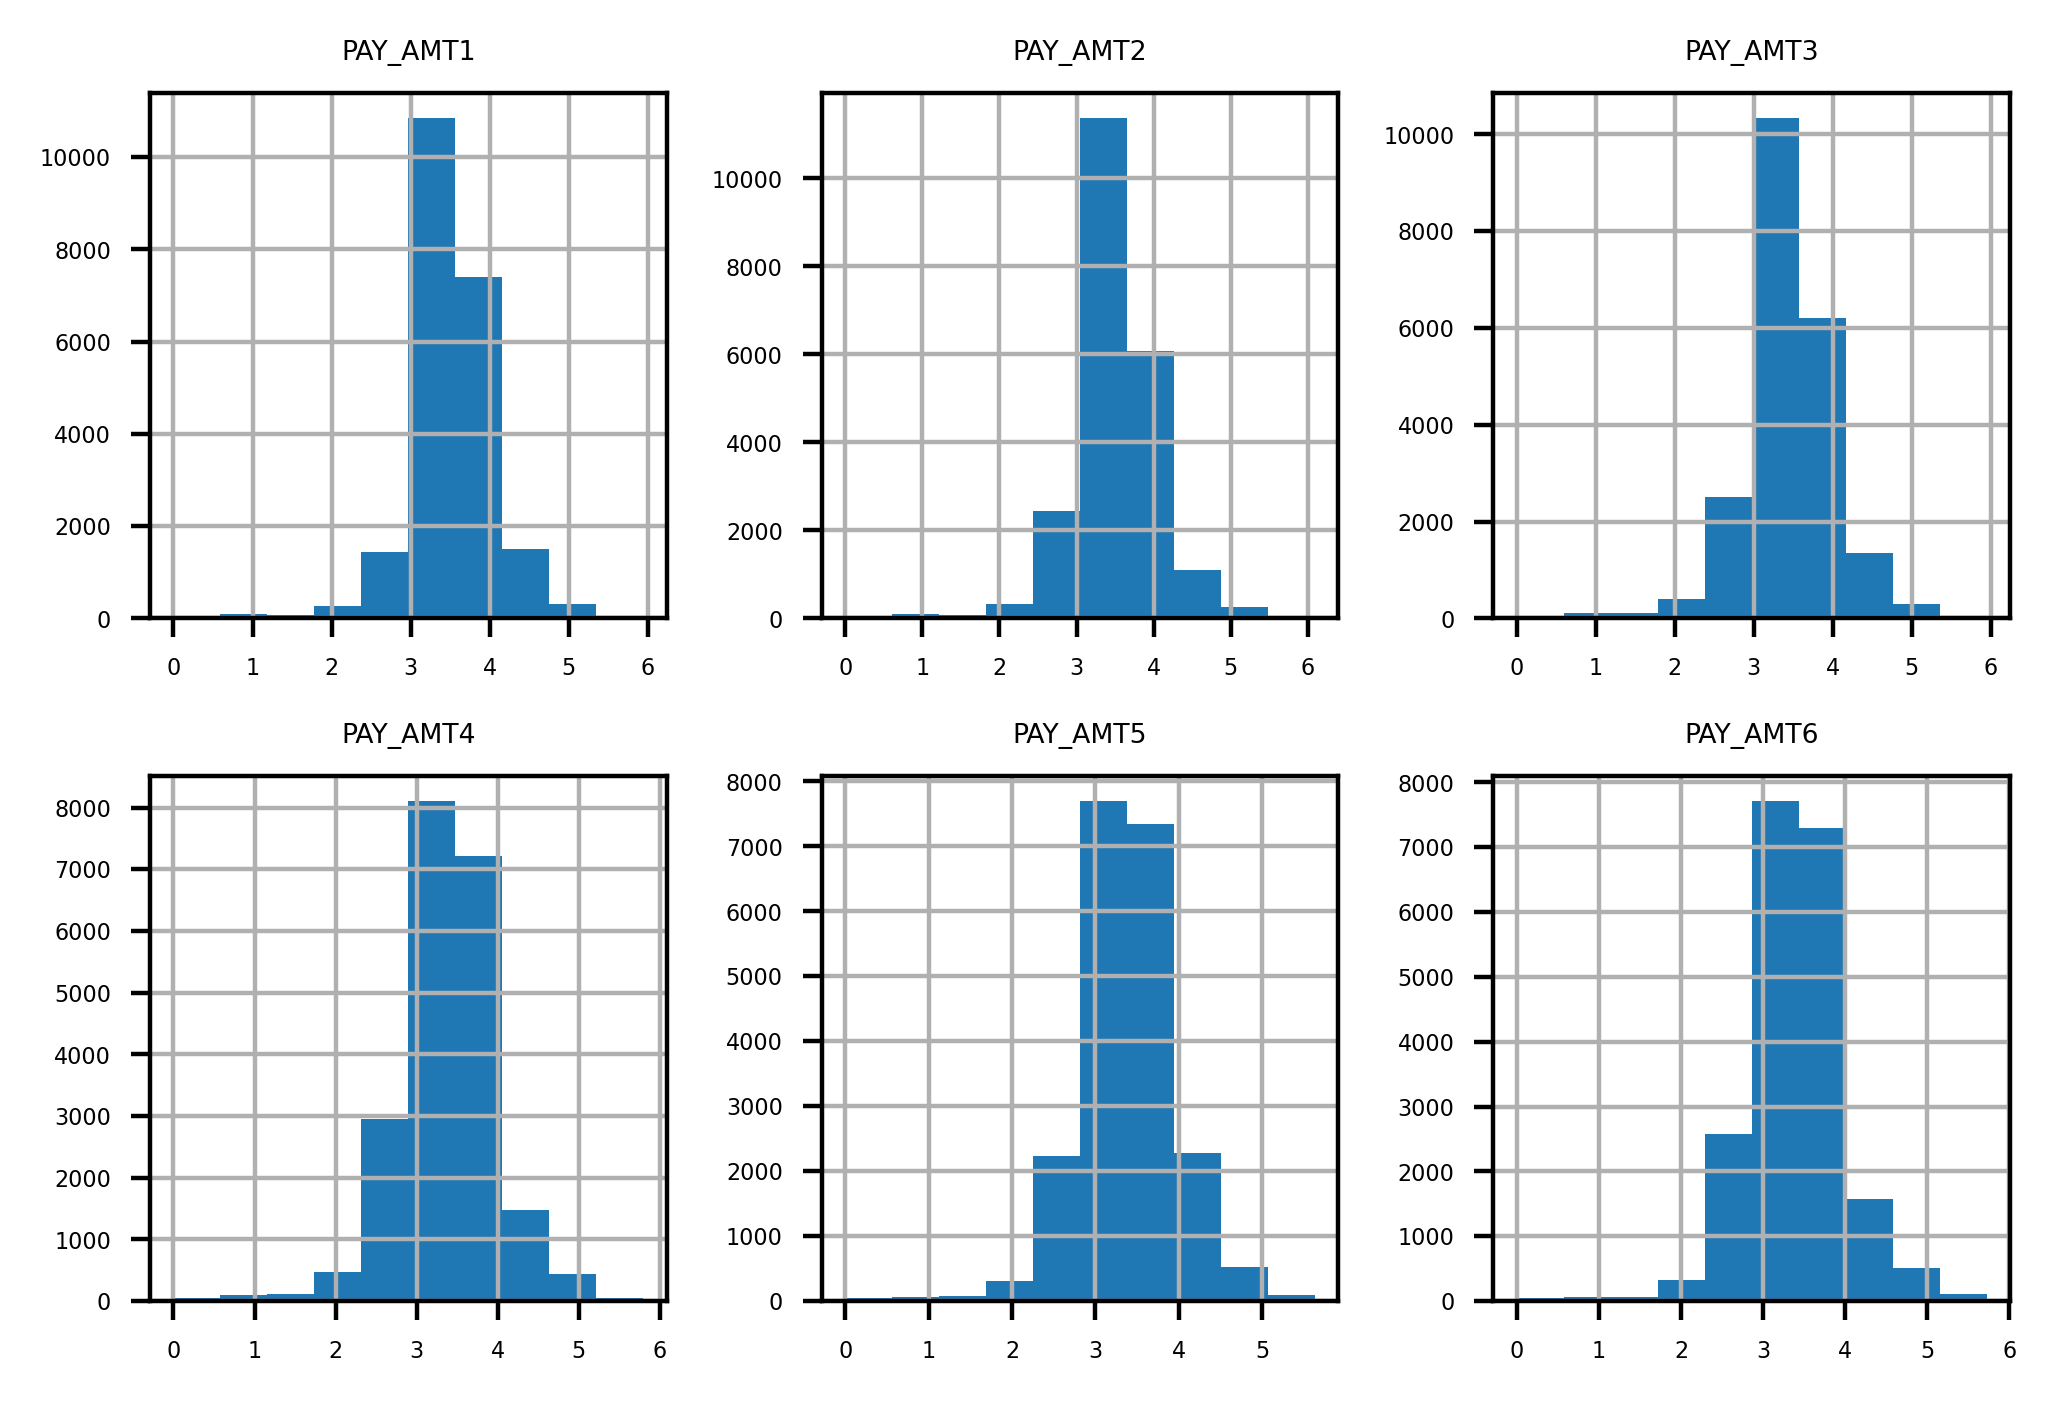

In [177]:
#Lets ignore the payment zero and tr to plot the hist
#mpl.rcParams['figure.dpi'] = 400
#mpl.rcParams['font.size'] = 4
exclude_zero = df[pay_amt_feats][~payment_zero_mask].apply(np.log10).hist(layout=(2,3))